In [9]:
from keras.datasets import mnist

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

# MPC

In [250]:
def display(digit):
    plt.imshow(digit, cmap = matplotlib.cm.binary, interpolation="nearest")
    #plt.axis("off")
    plt.show()

In [251]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
digit = x_train[9].reshape(28, 28)

In [257]:
digit[5:15]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 136, 247, 242,  86,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 192, 252, 187,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62,
        185,  18,   0,   0,   0,   0,  89, 236, 217,  47,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 216,
        253,  60,   0,   0,   0,   0, 212, 255,  81,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 206,
        252,  68,   0,   0,   0,  48, 242, 253,  89,   0,   0,   0,   0,
          0,   0],
       [  

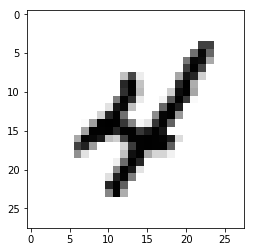

In [252]:
display(digit)

In [258]:
mask = np.random.randint(256, size=(28,28))
masked_digit = (digit - mask) % 256

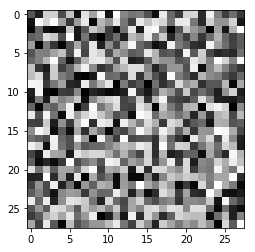

In [259]:
mask = np.random.randint(0, 256, size=(28,28))
display(mask)

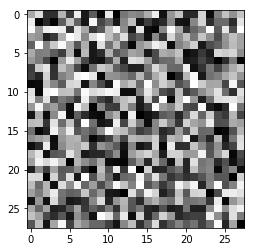

In [260]:
masked_digit = (digit - mask) % 256
display(masked_digit)

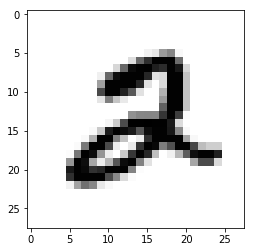

In [198]:
recovered_digit = (masked_digit + mask) % 256
display(recovered_digit)

# DP

In [179]:
nb_samples = 100000
nb_runs = 5
prob = 0.55

real = (np.random.rand(nb_samples, nb_runs) < prob).astype(np.int32)

first_coin = (np.random.rand(nb_samples, nb_runs) < 0.5).astype(np.int32)
second_coin = (np.random.rand(nb_samples, nb_runs) < 0.5).astype(np.int32)
noised = real*first_coin + second_coin*(1-first_coin)
estimated = 2*(noised-.25)

In [241]:
def display(tosses):
    nb_samples = len(tosses)
    cumulative_heads_ratio = np.cumsum(tosses, axis=0) / np.arange(1, nb_samples+1).reshape(-1, 1)
    plt.figure(figsize=(15,5))
    plt.plot(cumulative_heads_ratio)
    plt.plot([0, nb_samples], [prob, prob], "k--", linewidth=2, label="51%")
    #plt.plot([0, nb_samples], [0.5, 0.5], "k-", label="50%")
    plt.xlabel("Number of coin tosses")
    plt.ylabel("Heads ratio")
    plt.legend(loc="lower right")
    plt.axis([0, nb_samples, 0.5, 0.6])
    plt.show()

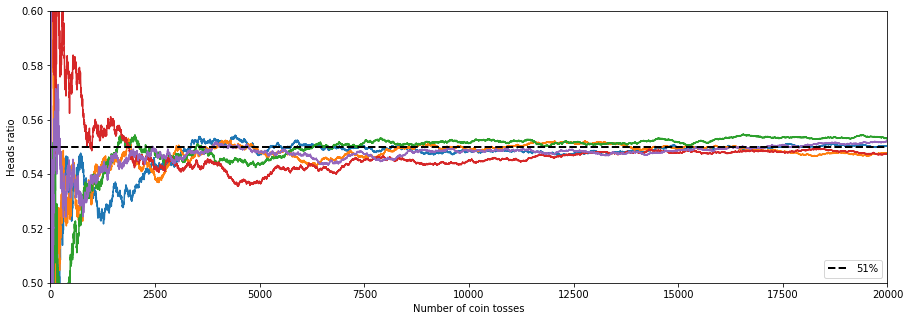

In [246]:
display(real[:20000])

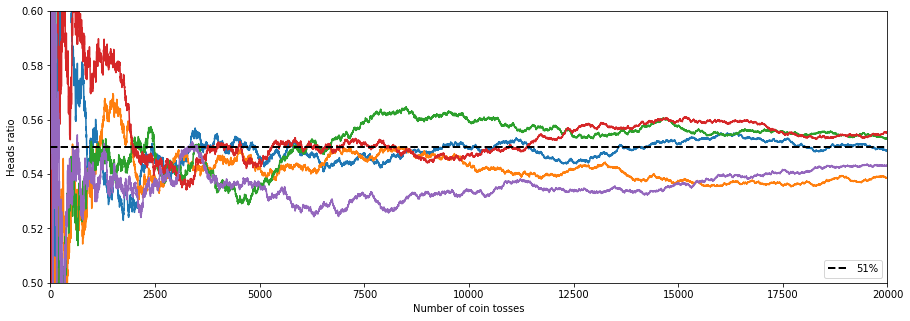

In [247]:
display(estimated[:20000])

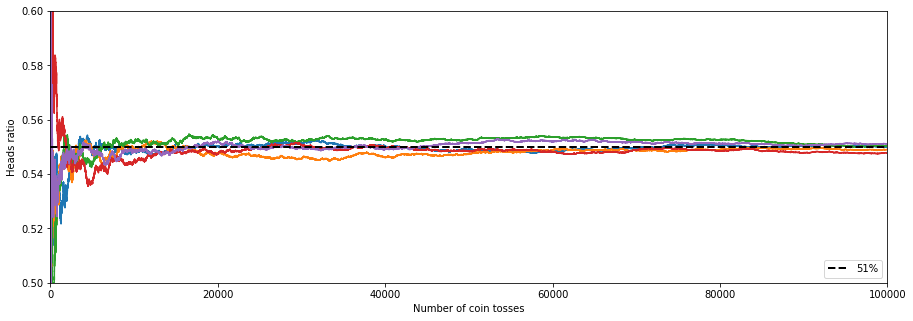

In [245]:
display(real)

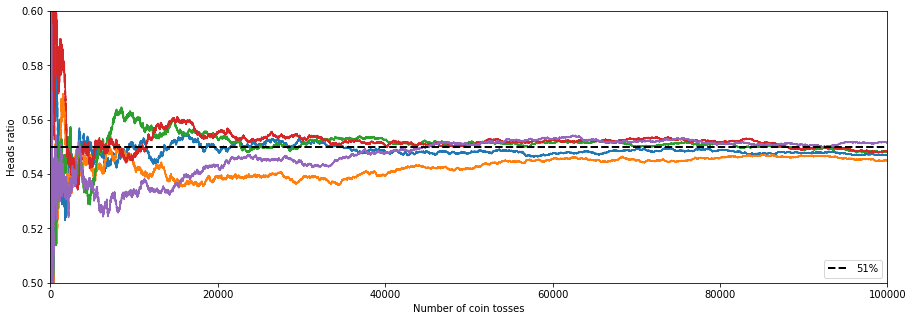

In [244]:
display(estimated)

In [232]:
x = [0.01, 0.02, .88, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
print(x)

[0.01, 0.02, 0.88, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


In [213]:
output = np.random.randint(0, 256, 10)
print(output)

[212 114  79  80 248  32  59  21 241  53]


In [214]:
[212 114  79  80 248  32  59  21 241  53]

SyntaxError: invalid syntax (<ipython-input-214-a09ad9384813>, line 1)

In [261]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [293]:
f_approx_1 = np.vectorize( lambda x: (1/2) + (x * 1/4) )
f_approx_3 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) )
f_approx_5 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) + (x**5 * 1/480) )
f_approx_7 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) + (x**5 * 1/480) - (x**7 * 17/80640) )
f_approx_9 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) + (x**5 * 1/480) - (x**7 * 17/80640) + (x**9 * 31/1451520) )

def f_interpolated(interval, degree, precision, xs, print=False):
    coefs = np.polyfit(interval, f_real(interval), degree)
    coefs = [ int(x * 10**precision) / 10**precision for x in coefs ]
    if print: 
        for e, coef in enumerate(coefs): 
            if coef != 0.0: print("x**{}: %.{}f".format(degree-e, precision) % coef)
    interpolated = np.poly1d(coefs)
    return interpolated(xs)

In [299]:
f_real = lambda x: 1/(1+np.exp(-x))
f_real = np.vectorize(lambda x: x if x > 0 else 0)

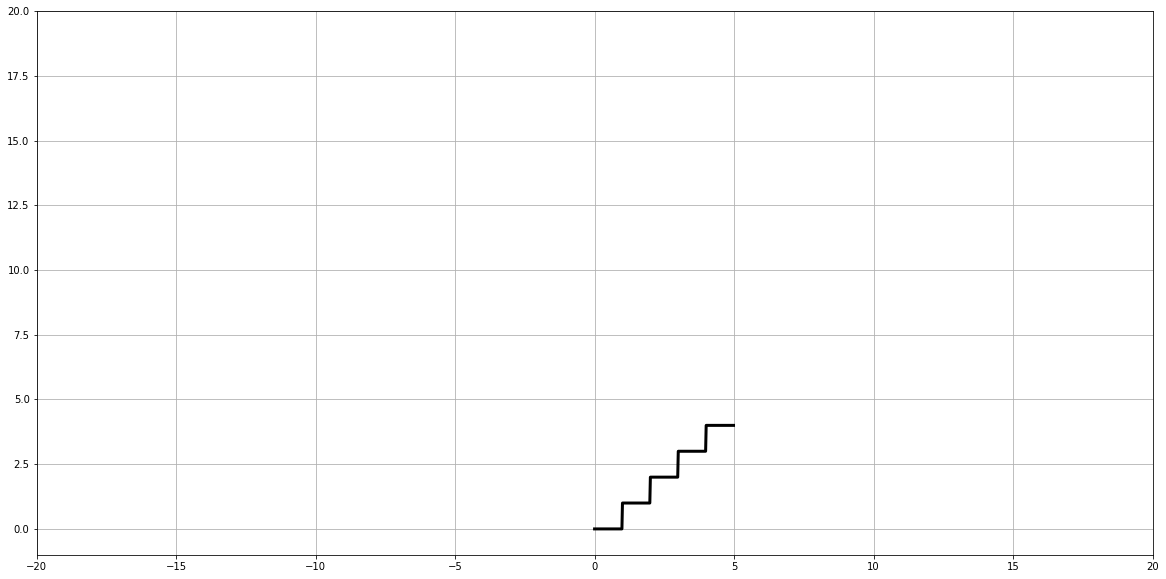

In [305]:
xs = np.arange(-20, 20, 100)
xs = np.arange(0., 5., 0.02)
plt.figure(figsize=(20,10))
plt.plot(xs, f_real(xs), color='k', linewidth=3.0)
plt.axis([-20, 20, -1, 20])
plt.legend(loc=2)
plt.grid(True)
plt.show()